In [1]:
%matplotlib inline

from netCDF4 import Dataset as ncread
import numpy as np
from datetime import datetime, date



In [2]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.path as mpath
from matplotlib.patches import Rectangle


# import matplotlib
import matplotlib.ticker
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# matplotlib.rc('xtick', labelsize=15); matplotlib.rc('ytick', labelsize=15)

# from mpl_toolkits.basemap import Basemap

In [3]:
def months():
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    monthsl = ['J','F','M','A','M','J','J','A','S','O','N','D']
    monthsl_shifted = ['J','A','S','O','N','D','J','F','M','A','M','J']   
    
months()

M=(31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)
firstdays=np.append(np.array(0),np.cumsum(M))
firstdays = firstdays[0:-1]
lastdays = firstdays+np.array(M)-1

ndjfm = list(range(firstdays[1-1],lastdays[3-1]+1))
x=range(firstdays[11-1],lastdays[11]+1)
ndjfm.extend(x)

djf = list(range(firstdays[1-1],lastdays[2-1]+1))
x=range(firstdays[12-1],lastdays[12-1]+1)
djf.extend(x)

jfm = list(range(firstdays[1-1],lastdays[3-1]+1))
nd = list(range(firstdays[11-1],lastdays[11]+1))
jfma = list(range(firstdays[1-1],lastdays[4-1]+1))

In [5]:
# load latitude, longitude
filedir = '/home/hillag/era5_test/'
filename = 'era5_an_uwind_reg2_6h_201001.nc'
filepath = filedir+filename

print(filepath)
NC = ncread(filepath)  

# get the grid:
latitude = NC.variables['lat'][:]
longitude = NC.variables['lon'][:]
plev = NC.variables['plev'][:]
ua = NC.variables['var131'][:]

NC.close()

/home/hillag/era5_test/era5_an_uwind_reg2_6h_201001.nc


In [6]:
#time,plev,lat,lon
sel_lat=latitude[15]
print(sel_lat)
sel_lev=np.where(plev/100==10)
print(sel_lev[0],'count from 0')
print(sel_lev[0]+1,'count from 1?')
# calculation of U1060 is performed using the cdo scripts 

ua.shape

60.0
[5] count from 0
[6] count from 1?


(124, 37, 91, 180)

In [7]:
print(plev)
print(longitude.shape,latitude.shape)

[   100.    200.    300.    500.    700.   1000.   2000.   3000.   5000.
   7000.  10000.  12500.  15000.  17500.  20000.  22500.  25000.  30000.
  35000.  40000.  45000.  50000.  55000.  60000.  65000.  70000.  75000.
  77500.  80000.  82500.  85000.  87500.  90000.  92500.  95000.  97500.
 100000.]
(180,) (91,)


In [8]:
sel_lev=np.where(plev/100==850)
print(sel_lev[0])

sel_lev=np.where(plev/100==300)
print(sel_lev[0])

[30]
[17]


In [9]:
# compare cdo to python, for zonal average and 60N

print(ua.shape)
print(longitude.shape)



sel_lat=np.where(latitude==60)
print(sel_lat[0])

sel_lev=np.where(plev/100==10)
print(sel_lev[0])


# # load Uclim for detection of events

num_years=43
ua1060_arr = np.zeros(shape=(num_years,365))

j = 0 #counter
for yy in range(1979,2022):
        print(yy)
        filedir1 = '/home/hillag/era5_test/U10/'
        filename1 = 'u_era5_daymean_%s.nc' % (yy)     
        filepath = filedir1+filename1
        # print(filepath)
        NC1 = ncread(filepath)    
        ua = np.squeeze(NC1.variables['var131'][:])
        ua_zm=np.mean(ua, axis=2)
        ua1060 = ua_zm[:,sel_lat[0]]
        # handle leap year
        if (len(ua1060) == 366):
            # print("366 days")
            ua1060_l=np.delete(ua1060, 31+29, axis=0)
            ua1060=ua1060_l
        ua1060_arr[j,:]=ua1060.T
        j = j+1

                      
print(ua1060_arr.shape)
# ua_zonalmean_at1060 = ua_zonalmean[:,]


(124, 37, 91, 180)
(180,)
[15]
[5]
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
(43, 365)


In [10]:
# # load Uclim for detection of events

# num_years=37
# ua1060_arr = np.zeros(shape=(num_years,365))

# j = 0 #counter
# for yy in range(1979,2015):
#         print(yy)
#         filedir1 = '/home/hillag/era5_test/u1060_ERA5/'
#         filename1 = 'u1060_reg2_6h_%s.nc' % (yy)     
#         filepath = filedir1+filename1
#         # print(filepath)
#         NC1 = ncread(filepath)    
#         ua1060 = np.squeeze(NC1.variables['u'][:])
#         # handle leap year
#         if (len(ua1060) == 366):
#             # print("366 days")
#             ua1060_l=np.delete(ua1060, 31+29, axis=0)
#             ua1060=ua1060_l
#         ua1060_arr[j,:]=ua1060
#         j = j+1

                      
# print(ua1060_arr.shape)

In [11]:
# compare 1979 between python and cdo:

# ua1060_cdo = ua1060_arr[0,:]
# ua1060_python = ua_zonalmean_at1060




In [12]:
# print(ua1060_cdo[0:10])
# print(ua1060_python[0:10])

In [13]:
# --------------------
# define criterion for weak vortex
# --------------------

# --------------------
# reorganize months (i.e., winter in the middle)
# --------------------
u_zm_60 = np.copy(ua1060_arr)
u_zm_60_nd = u_zm_60[:,nd]
u_zm_60_jfm = u_zm_60[:,jfm]

len_ndjfm = np.size(u_zm_60_jfm,1)+np.size(u_zm_60_nd,1)
print("length of a season:",len_ndjfm)
len_years = np.size(u_zm_60_jfm,0)
u_zm_60_ndjfm = np.zeros((len_years-1,len_ndjfm))
# print(u_zm_60_ndjfm.shape)
#
# from Nov-Dec 1979 to JFM 2019
for ii in range(0,len_years-1):
        u_zm_60_ndjfm[ii,0:len(nd)] =u_zm_60_nd[ii,:] #i.e. 1979
        u_zm_60_ndjfm[ii,len(nd):len(nd)+90]=u_zm_60_jfm[ii+1,:] # i.e. 1980
    
# --------------------
# find when the NDJFM mean is below 0 m/s
# --------------------
weak_vortex_first_day = np.empty((150,3))
ind=0

# --------------------
# loop to detect events: the date in which the winds first change from westerly to easterly
# --------------------
for ii in range(0,len_years-1):
    days_returned=0
    for jj in range(0,np.size(u_zm_60_ndjfm,1)):
        if (u_zm_60_ndjfm[ii,jj]>=48 and days_returned>=20):
        # if (u_zm_60_ndjfm[ii,jj]<0 and days_returned>=20):
        # if (u_zm_60_ndjfm[ii,jj]<=0):
            print(ii,jj,u_zm_60_ndjfm[ii,jj],days_returned)
            weak_vortex_first_day[ind,0]=ii
            weak_vortex_first_day[ind,1]=jj
            weak_vortex_first_day[ind,2]=u_zm_60_ndjfm[ii,jj]
            ind=ind+1
            days_returned=0
        elif (u_zm_60_ndjfm[ii,jj]>0):
            # count number of days returned from event
            days_returned=days_returned+1
weak_vortex_first_day = weak_vortex_first_day[0:ind]



length of a season: 151
0 75 51.72220230102539 75
0 96 49.25889587402344 20
1 37 49.31686782836914 37
1 58 60.62419128417969 20
1 79 57.73760986328125 20
3 40 48.91246795654297 40
3 62 52.4726448059082 21
4 47 49.51634216308594 47
4 68 58.117034912109375 20
4 89 61.02219009399414 20
6 48 53.45480728149414 48
7 20 49.399654388427734 20
8 85 48.687835693359375 76
8 106 63.854026794433594 20
9 48 53.111610412597656 48
9 69 49.69865036010742 20
9 94 55.33362579345703 24
10 50 51.05303955078125 50
11 35 49.61969757080078 35
11 56 57.096092224121094 20
12 46 48.029048919677734 46
13 48 48.42856979370117 48
13 75 48.193458557128906 26
15 41 48.284706115722656 41
15 71 49.98716354370117 29
16 59 52.57368850708008 59
16 96 48.98392868041992 36
17 63 48.76266098022461 63
17 94 49.007118225097656 30
17 125 48.944217681884766 30
20 50 48.31938552856445 50
20 71 62.586177825927734 20
25 45 48.372802734375 45
25 67 52.527591705322266 21
25 102 49.75540542602539 34
27 34 48.02875518798828 34
27 71 48

In [20]:
# verify the right day in the year:
doy_list=np.array(nd+jfm)


In [21]:
from datetime import datetime

ind_list=weak_vortex_first_day[:,1]
year_list=weak_vortex_first_day[:,0]+1979
counter=0
for ii in ind_list:
    # nd:
    if (ii < 61):
        ii2 = doy_list[int(ii)]+1
        year = str(int(year_list[counter]))
    # jfm:
    else:
        ii2= doy_list[int(ii)]+1
        year = str(int(year_list[counter]+1))
    day_num=str(int(ii2))   
    # converting to date
    res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
    print(str(res))
    counter=counter+1





01-15-1980
02-05-1980
12-07-1980
12-28-1980
01-19-1981
12-11-1982
01-02-1983
12-18-1983
01-08-1984
01-29-1984
12-19-1985
11-21-1986
01-25-1988
02-15-1988
12-18-1988
01-09-1989
02-03-1989
12-21-1989
12-06-1990
12-27-1990
12-17-1991
12-18-1992
01-15-1993
12-12-1994
01-11-1995
12-30-1995
02-05-1996
01-03-1997
02-03-1997
03-06-1997
12-21-1999
01-11-2000
12-15-2004
01-07-2005
02-11-2005
12-05-2006
01-11-2007
12-23-2007
01-19-2008
12-28-2008
01-07-2010
01-21-2011
02-18-2011
12-15-2013
01-05-2014
12-04-2015
12-25-2015
01-15-2016
02-16-2016
12-19-2016
01-13-2017
12-30-2017
03-10-2019
12-16-2019
01-06-2020
02-13-2020
03-05-2020


In [22]:
# 33 ssws in 37 years)
(counter-1)/num_years

1.302325581395349

In [17]:
# make a list without final warmings. At the moment I only exclude dates beyond mid-March:
from datetime import datetime


ind_list=weak_vortex_first_day[:,1]
year_list=weak_vortex_first_day[:,0]+1979

save_arr=np.zeros_like(ind_list) 
weak_vortex_first_day_only_ssw=np.zeros_like(weak_vortex_first_day)

counter=0
final_date=136
for ii in range(0,len(ind_list)):
    if ind_list[ii]<final_date:
        save_arr[counter]=ii 
        weak_vortex_first_day_only_ssw[counter] = weak_vortex_first_day[ii,:]
        counter=counter+1
           
print(save_arr)
save_arr=list(np.nonzero(save_arr))
last_ind=save_arr[-1][-1]
print(last_ind)
weak_vortex_first_day_only_ssw=weak_vortex_first_day_only_ssw[0:last_ind+1,:]
# 
# ------------

# for ii in range(0,len(ind_list)):
#     weak_vortex_first_day_only_ssw = weak_vortex_first_day[save_arr,:]

ind_list=weak_vortex_first_day_only_ssw[:,1]
year_list=weak_vortex_first_day_only_ssw[:,0]+1979

counter=0
for ii in ind_list:
    # nd:
    if (ii < 61):
        ii2 = doy_list[int(ii)]+1
        year = str(int(year_list[counter]))
    # jfm:
    else:
        ii2= doy_list[int(ii)]+1
        year = str(int(year_list[counter]+1))
    day_num=str(int(ii2))   
    # converting to date
    res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
    print(str(res))
    counter=counter+1


# weak_vortex_first_day = weak_vortex_first_day_only_ssw

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56.]
56
01-15-1980
02-05-1980
12-07-1980
12-28-1980
01-19-1981
12-11-1982
01-02-1983
12-18-1983
01-08-1984
01-29-1984
12-19-1985
11-21-1986
01-25-1988
02-15-1988
12-18-1988
01-09-1989
02-03-1989
12-21-1989
12-06-1990
12-27-1990
12-17-1991
12-18-1992
01-15-1993
12-12-1994
01-11-1995
12-30-1995
02-05-1996
01-03-1997
02-03-1997
03-06-1997
12-21-1999
01-11-2000
12-15-2004
01-07-2005
02-11-2005
12-05-2006
01-11-2007
12-23-2007
01-19-2008
12-28-2008
01-07-2010
01-21-2011
02-18-2011
12-15-2013
01-05-2014
12-04-2015
12-25-2015
01-15-2016
02-16-2016
12-19-2016
01-13-2017
12-30-2017
03-10-2019
12-16-2019
01-06-2020
02-13-2020
03-05-2020


(42, 151)


/tmp/ipykernel_23943/2214705229.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,3),facecolor='none')


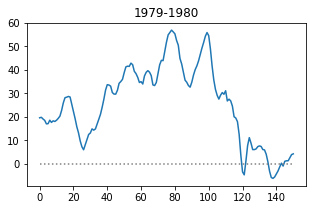

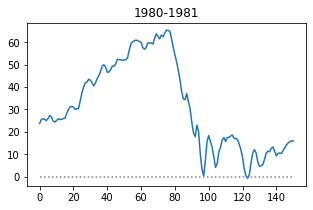

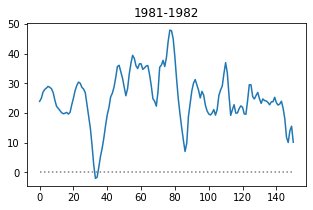

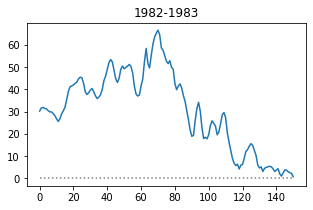

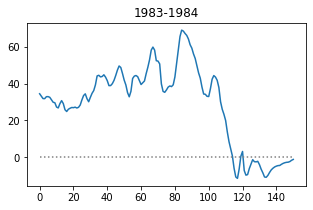

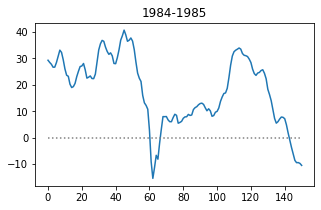

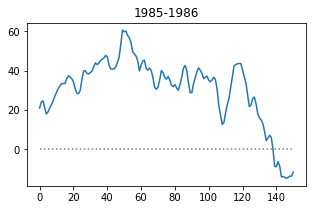

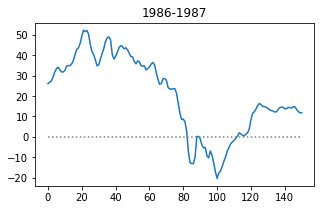

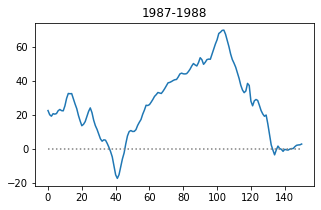

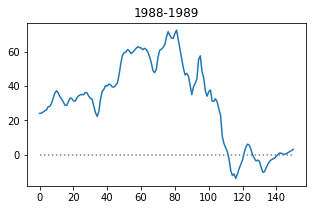

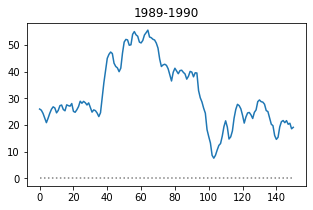

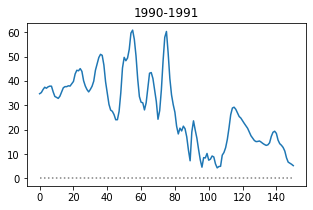

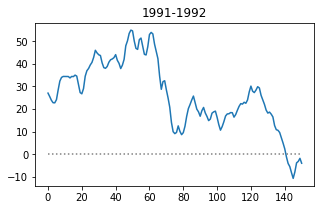

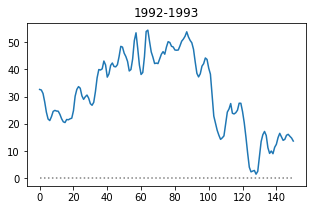

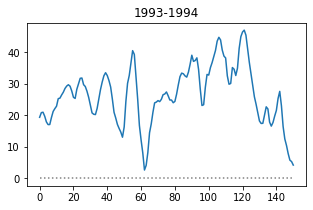

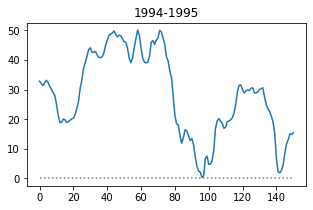

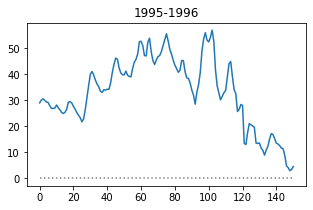

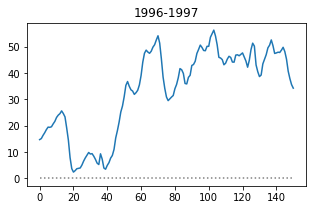

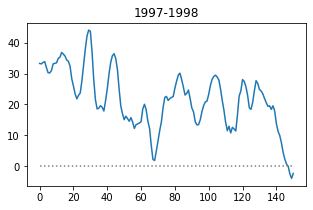

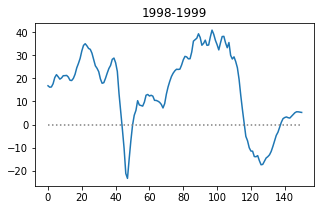

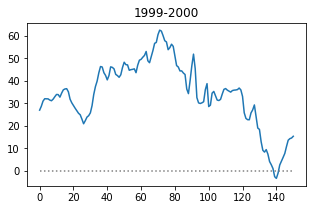

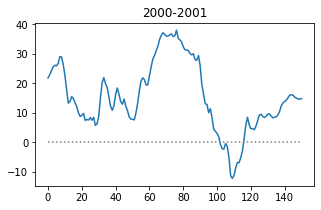

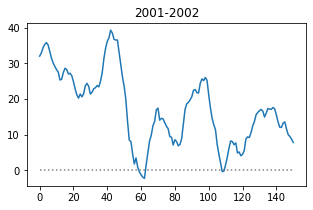

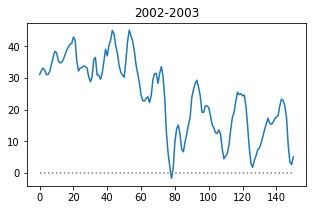

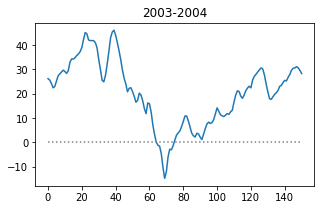

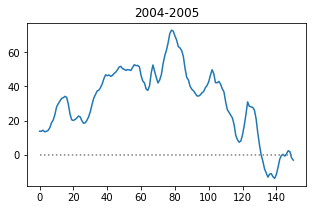

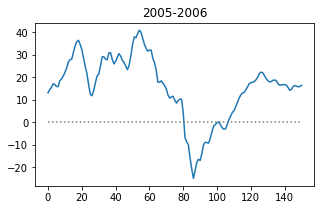

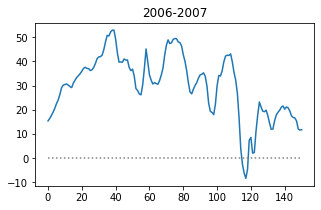

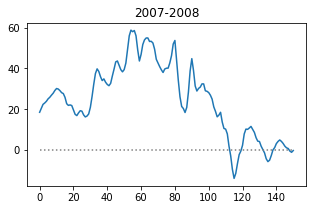

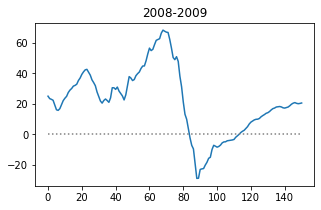

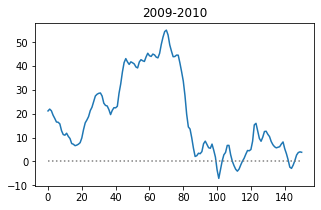

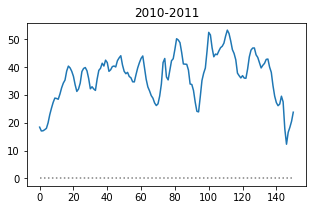

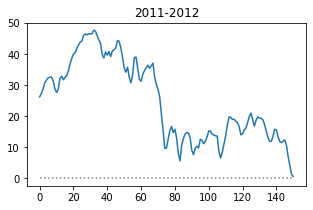

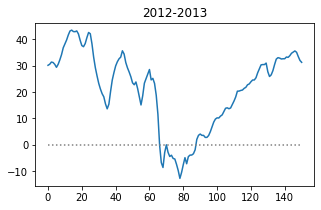

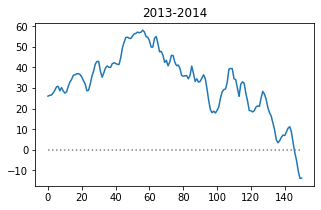

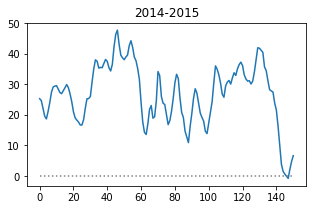

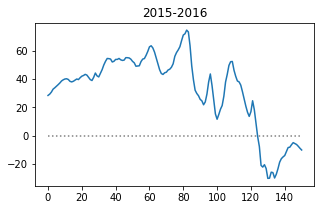

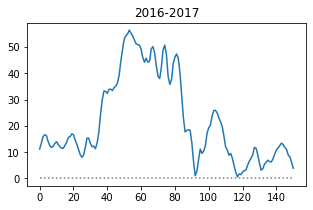

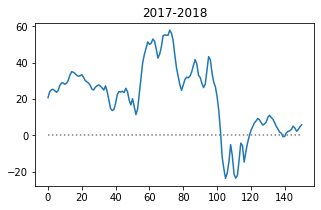

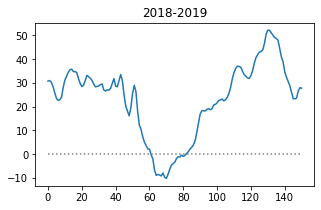

In [24]:
# plot with time:

print(u_zm_60_ndjfm.shape)

for ii in range(1979,2019):
    # print(yy)    
    ind=ii-1979
    fig = plt.figure(figsize=(5,3),facecolor='none')
    plt.plot(u_zm_60_ndjfm[ind,:])
    plt.title('%s-%s' % (ind+1979,ind+1979+1))
    plt.plot(range(0,150),0*np.arange(0,150),color='grey',linestyle='dotted')
